In [1]:
%load_ext autoreload
%autoreload 2

In [12]:
from model_selection import top_model_confusion
from utils import serialize, deserialize, serialize_model, deserialize_model

encoder = 'COLLAPSE'
metal = 'ZN'
metric_str = "precision"
results_cache_dir = f"../data/{encoder}_{metal}_gridsearch_results/{encoder}-eval_results"
model_cache_dir = f"../data/{encoder}_{metal}_gridsearch_results/{encoder}-fitted_k2_models"
linearized_cache_dir = f"../data/{encoder}_{metal}_gridsearch_results/{encoder}-linearized_data"

top_model_confusion(metric_str,results_cache_dir, model_cache_dir, eval_class=1)

('k15_r0_cutoff6.00_alpha0.500_tau0.00_lamnan.model',
 0.9,
 0.3041668074688543,
 0.3041668074688543)

In [13]:
confusion_all_models = deserialize(f"../data/results/{metal}_confusion_all_train_models.pkl")
confusion_class1_models = deserialize(f"../data/results/{metal}_confusion_class1_train_models.pkl")
datum_level_models = deserialize(f"../data/results/{metal}_datum_level_train_models.pkl")
continuous_avg_models = deserialize(f"../data/results/{metal}_continuous_avg_train_models.pkl")
continuous_iid_models = deserialize(f"../data/results/{metal}_continuous_iid_train_models.pkl")

FileNotFoundError: [Errno 2] No such file or directory: '../data/results/ZN_confusion_all_train_models.pkl'

In [4]:
confusion_class1_models

{'msd': ('k20_r0_cutoff8.00_alpha0.001_tau2.00_lamnan.model', 0.0),
 'specificity': ('k20_r1_cutoff6.00_alpha0.100_tau2.00_lamnan.model', 0.5),
 'precision': ('k20_r2_cutoff6.00_alpha0.100_tau0.00_lamnan.model', 0.9),
 'fnr': ('k20_r1_cutoff6.00_alpha0.100_tau2.00_lamnan.model', 0.5),
 'fdr': ('k20_r2_cutoff4.00_alphanan_taunan_lam0.50.model', 0.9),
 'recall': ('k20_r1_cutoff6.00_alpha0.100_tau2.00_lamnan.model', 0.0),
 'accuracy': ('k20_r1_cutoff6.00_alpha0.100_tau2.00_lamnan.model', 0.5),
 'balanced_acc': ('k20_r0_cutoff4.00_alphanan_taunan_lam0.50.model', 0.6),
 'correlation': ('k20_r4_cutoff6.00_alpha0.001_tau0.00_lamnan.model', 0.9),
 'threat_score': ('k20_r4_cutoff6.00_alpha0.001_tau0.00_lamnan.model', 0.9),
 'prevalence': ('k20_r1_cutoff6.00_alpha0.100_tau2.00_lamnan.model', 0.0),
 'dice': ('k20_r4_cutoff6.00_alpha0.001_tau0.00_lamnan.model', 0.9),
 'jaccard': ('k20_r4_cutoff6.00_alpha0.001_tau0.00_lamnan.model', 0.9)}

In [ ]:
from model_selection import k_hop_precision
for encoder in ['COLLAPSE', 'ESM', 'AA']:
    results_cache_dir = f"../data/{encoder}_{metal}_gridsearch_results/{encoder}-eval_results"
    model_cache_dir = f"../data/{encoder}_{metal}_gridsearch_results/{encoder}-fitted_k2_models"
    linearized_cache_dir = f"../data/{encoder}_{metal}_gridsearch_results/{encoder}-linearized_data"
    graph_base_dir = f"../data/COLLAPSE_{metal}_cutoff_train_graphs"

    results = k_hop_precision('protein', results_cache_dir, linearized_cache_dir, model_cache_dir, graph_base_dir, eval_class='both')
    
    print(encoder, results)
    """
    
for encoder in ['COLLAPSE', 'ESM', 'AA']:
    results_cache_dir = f"../data/{encoder}_{metal}_gridsearch_results/{encoder}-eval_results"
    model_cache_dir = f"../data/{encoder}_{metal}_gridsearch_results/{encoder}-fitted_k2_models"
    linearized_cache_dir = f"../data/{encoder}_{metal}_gridsearch_results/{encoder}-linearized_data"
    graph_base_dir = f"../data/{encoder}_{metal}_cutoff_train_graphs"

    results = k_hop_precision('protein', results_cache_dir, linearized_cache_dir, model_cache_dir, graph_base_dir, eval_class=1)
    print(encoder, results)
    """

In [38]:
valid_metrics = ["msd", "specificity", "precision", "fnr", "fdr", "recall", "accuracy", "balanced_acc", "correlation", "threat_score", "prevalence", "dice", "jaccard"]
for metric_str in valid_metrics:
    print(metric_str)
    results = top_model_confusion(metric_str,results_cache_dir, model_cache_dir)
    print(results)

msd
('k20_r0_cutoff8.00_alpha0.001_tau2.00_lamnan.model', '>', 361.22301951779565)
specificity
('k10_r0_cutoff4.00_alpha0.001_tau0.00_lamnan.model', 1.0, 1.0)
precision
('k20_r2_cutoff6.00_alpha0.100_tau0.00_lamnan.model', 0.9, 0.027639492988932958)
fnr
('k10_r0_cutoff4.00_alpha0.001_tau0.00_lamnan.model', 1.0, 0.48679678530424797)
fdr
('k15_r1_cutoff4.00_alphanan_taunan_lam0.50.model', 0.9, 0.9976602850353525)
recall
('k20_r1_cutoff6.00_alpha0.100_tau2.00_lamnan.model', 0.0, 1.0)
accuracy
('k10_r0_cutoff4.00_alpha0.001_tau0.00_lamnan.model', 1.0, 0.9929412145133447)
balanced_acc
('k20_r2_cutoff6.00_alpha0.100_tau0.00_lamnan.model', 0.9, 0.5104395595671256)
correlation
('k20_r0_cutoff8.00_alpha0.001_tau0.00_lamnan.model', 0.9, 0.03524971449809501)
threat_score


/oak/stanford/groups/rbaltman/aderry/K2/src/metrics.py:104: RuntimeWarning: invalid value encountered in scalar divide
  return tp / (tp + fn + fp)


('k20_r0_cutoff8.00_alpha0.001_tau0.00_lamnan.model', 0.9, 0.018289480717047984)
prevalence
('k10_r0_cutoff4.00_alpha0.001_tau0.00_lamnan.model', 0.0, 0.007058785486655712)
dice
('k15_r1_cutoff4.00_alpha0.100_tau2.00_lamnan.model', '<', 0.5132626435597806)
jaccard
('k15_r1_cutoff4.00_alpha0.100_tau2.00_lamnan.model', '<', 0.5132331635114069)


In [39]:
valid_metrics = ["msd", "specificity", "precision", "fnr", "fdr", "recall", "accuracy", "balanced_acc", "correlation", "threat_score", "prevalence", "dice", "jaccard"]
for metric_str in valid_metrics:
    print(metric_str)
    results = top_model_confusion(metric_str, results_cache_dir, model_cache_dir, eval_class=0)
    print(results)

msd
('k20_r0_cutoff8.00_alpha0.001_tau2.00_lamnan.model', '>', 343.8249440715884)
specificity
('k10_r0_cutoff4.00_alpha0.001_tau0.00_lamnan.model', 1.0, 1.0)
precision
('k10_r0_cutoff4.00_alpha0.001_tau0.00_lamnan.model', 0.0, 0.0)
fnr
('k10_r0_cutoff4.00_alpha0.001_tau0.00_lamnan.model', 0.0, 0.0)
fdr
('k10_r0_cutoff4.00_alpha0.001_tau0.00_lamnan.model', 0.0, 1.0)
recall
('k10_r0_cutoff4.00_alpha0.001_tau0.00_lamnan.model', 0.0, 1.0)
accuracy
('k10_r0_cutoff4.00_alpha0.001_tau0.00_lamnan.model', 1.0, 1.0)
balanced_acc
('k10_r0_cutoff4.00_alpha0.001_tau0.00_lamnan.model', 0.0, 0.5)
correlation
('k10_r0_cutoff4.00_alpha0.001_tau0.00_lamnan.model', 0.0, 0.0)
threat_score
('k10_r0_cutoff4.00_alpha0.001_tau0.00_lamnan.model', 0.0, 0.0)
prevalence
('k10_r0_cutoff4.00_alpha0.001_tau0.00_lamnan.model', 0.0, 0.0)
dice
('k10_r0_cutoff4.00_alpha0.001_tau0.00_lamnan.model', 1.0, 1.0)
jaccard
('k10_r0_cutoff4.00_alpha0.001_tau0.00_lamnan.model', 1.0, 1.0)


In [14]:
valid_metrics = ["msd", "specificity", "precision", "fnr", "fdr", "recall", "accuracy", "balanced_acc", "correlation", "threat_score", "prevalence", "dice", "jaccard"]
for metric_str in valid_metrics:
    print(metric_str)
    results = top_model_confusion(metric_str, results_cache_dir, model_cache_dir, eval_class=1)
    print(results)

msd
('k15_r2_cutoff6.00_alpha0.100_tau0.00_lamnan.model', 0.0, 315.8590909090909, 315.8590909090909)
specificity
('k25_r4_cutoff4.00_alpha10000000000.000_tau2.00_lamnan.model', 1.0, 1.0, 0.7515132105463032)
precision
('k15_r0_cutoff6.00_alpha0.500_tau0.00_lamnan.model', 0.9, 0.3041668074688543, 0.3041668074688543)
fnr
('k25_r4_cutoff4.00_alpha10000000000.000_tau2.00_lamnan.model', 1.0, 1.0, 0.9757319223985891)
fdr
('k15_r4_cutoff4.00_alphanan_taunan_lam0.50.model', 0.5, 0.9832821100673487, 0.9832821100673487)
recall
('k20_r4_cutoff4.00_alpha0.001_tau0.00_lamnan.model', 0.0, 1.0, 1.0)
accuracy
('k25_r0_cutoff4.00_alpha0.010_tau2.00_lamnan.model', 0.9, 0.9890565010244482, 0.6742095176662541)
balanced_acc
('k25_r0_cutoff4.00_alphanan_taunan_lam0.50.model', 0.5, 0.6824292907063454, 0.20249396245272494)
correlation
('k20_r0_cutoff4.00_alpha0.001_tau0.00_lamnan.model', 0.9, 0.283302755744555, 0.43019888279702956)
threat_score
('k25_r0_cutoff4.00_alpha0.010_tau2.00_lamnan.model', 0.9, 0.25042

In [15]:
from model_selection import top_model_preds
valid_metrics = ["auroc", "auprc", "ap"]
for metric_str in valid_metrics:
    print(metric_str)
    results = top_model_preds(metric_str, results_cache_dir, model_cache_dir)
    print(results)

auroc
('k15_r0_cutoff4.00_alpha0.500_tau1.00_lamnan.model', 0.6417658365026786)
auprc
('k15_r0_cutoff4.00_alpha0.500_tau1.00_lamnan.model', 0.7503116923180316)
ap
('k15_r1_cutoff4.00_alpha0.001_tau2.00_lamnan.model', 0.6186558235373336)


In [16]:
from model_selection import top_model_continuous_avg
valid_metrics = ["auroc", "auprc", "ap"]
for metric_str in valid_metrics:
    print(metric_str)
    results = top_model_continuous_avg(metric_str, results_cache_dir, model_cache_dir)
    print(results)

auroc
('k30_r0_cutoff4.00_alphanan_taunan_lam0.50.model', 0.6973103715675234)
auprc
('k15_r0_cutoff4.00_alpha0.500_tau1.00_lamnan.model', 0.623781770088546)
ap
('k30_r0_cutoff4.00_alpha10000000000.000_tau0.00_lamnan.model', 0.28177340947313906)


In [20]:
from model_selection import top_model_continuous_iid
valid_metrics = ["auroc", "auprc", "ap"]
for metric_str in valid_metrics:
    print(metric_str)
    results = top_model_continuous_iid(metric_str, model_cache_dir, linearized_cache_dir)
    print(results)

auroc
('k15_r0_cutoff4.00_alpha0.500_tau1.00_lamnan.model', 0.722221562467037)
auprc
('k15_r0_cutoff4.00_alpha0.500_tau1.00_lamnan.model', 0.4308754654861674)
ap
('k25_r0_cutoff4.00_alpha0.010_tau2.00_lamnan.model', 0.293951822492335)


In [263]:
encoder = 'AA'
metal = 'ZN'

results_cache_dir = f"../data/{encoder}_{metal}_baseline-GAT_gridsearch_results/{encoder}-eval_results"
model_cache_dir = f"../data/{encoder}_{metal}_baseline-GAT_gridsearch_results/{encoder}-fitted_k2_models"
linearized_cache_dir = f"../data/{encoder}_{metal}_baseline-GAT_gridsearch_results/{encoder}-linearized_data"

In [264]:
key_conf_metrics = ["precision", "correlation", "dice"]
key_cont_metrics = ["auprc"]

In [265]:
from model_selection import top_model_confusion, top_model_continuous_avg
conf_res = []
for metric in key_conf_metrics:
    print(metric)
    res = top_model_confusion(metric,results_cache_dir, model_cache_dir, eval_class=1, return_all=True)
    res["metric"] = [metric]*len(res)
    conf_res.append(res)
conf_res = pd.concat(conf_res)

cont_res = []
for metric in key_cont_metrics:
    print(metric)
    res = top_model_continuous_avg(metric, results_cache_dir, model_cache_dir, return_all=True)
    res["metric"] = [metric]*len(res)
    cont_res.append(res)
cont_res = pd.concat(cont_res)

precision
correlation
dice
auprc


In [266]:
conf_pvt = conf_res.pivot(index=['model_name', 'threshold'], columns='metric', values='score')
for met in key_conf_metrics:
    rank = conf_pvt[met].rank(method='min', ascending=False)
    conf_pvt[f'rank_{met}'] = rank
# conf_pvt['rank'] = conf_pvt[key_conf_metrics].apply(tuple,axis=1).rank(method='dense',ascending=False)

cont_pvt = cont_res.pivot(index='model_name', columns='metric', values='score')
cont_pvt['rank_auprc'] = cont_pvt['auprc'].rank(method='min', ascending=False)

merged = pd.merge(conf_pvt.reset_index(level=['threshold']), cont_pvt, on='model_name', how='left')
merged['avg_rank'] = merged[[f'rank_{i}' for i in key_conf_metrics] + ['rank_auprc']].mean(axis=1)
merged.sort_values('avg_rank').head(20)

metric,threshold,correlation,dice,precision,rank_precision,rank_correlation,rank_dice,auprc,rank_auprc,avg_rank
model_name,,,,,,,,,,
AA-ZN-8.0-0.0005,0.6,0.187280,0.134887,0.096196,2.0,1.0,1.0,0.090102,1.0,1.25
AA-ZN-8.0-0.0005,0.5,0.169521,0.120183,0.082058,3.0,2.0,2.0,0.090102,1.0,2.00
AA-ZN-8.0-0.0005,0.7,0.126771,0.114342,0.105704,1.0,4.0,3.0,0.090102,1.0,2.25
AA-ZN-8.0-0.0005,0.4,0.158232,0.111193,0.074307,4.0,3.0,4.0,0.090102,1.0,3.00
AA-ZN-8.0-0.0005,0.3,0.090690,0.066392,0.038530,5.0,5.0,5.0,0.090102,1.0,4.00
AA-ZN-8.0-0.0005,0.2,0.000049,0.040068,0.021244,6.0,6.0,6.0,0.090102,1.0,4.75
AA-ZN-8.0-0.0005,0.0,0.000000,0.040068,0.021243,7.0,7.0,7.0,0.090102,1.0,5.50
AA-ZN-8.0-0.0005,0.1,0.000000,0.040068,0.021243,7.0,7.0,7.0,0.090102,1.0,5.50
AA-ZN-8.0-0.0005,0.9,0.000000,0.000000,0.000000,9.0,7.0,9.0,0.090102,1.0,6.50


## Ranking gridsearch models

In [252]:
import pandas as pd

encoder = 'ESM'
metal = 'ZN'

results_cache_dir = f"../data/{encoder}_{metal}_gridsearch_results/{encoder}-eval_results"
model_cache_dir = f"../data/{encoder}_{metal}_gridsearch_results/{encoder}-fitted_k2_models"
processor_cache_dir = f"../data/{encoder}_{metal}_gridsearch_results/{encoder}-fitted_k2_processors"
linearized_cache_dir = f"../data/{encoder}_{metal}_gridsearch_results/{encoder}-linearized_data"

In [253]:
from model_selection import top_model_confusion, top_model_continuous_avg
conf_res = []
for metric in key_conf_metrics:
    print(metric)
    res = top_model_confusion(metric,results_cache_dir, model_cache_dir, eval_class=1, return_all=True)
    res["metric"] = [metric]*len(res)
    conf_res.append(res)
conf_res = pd.concat(conf_res)

cont_res = []
for metric in key_cont_metrics:
    print(metric)
    res = top_model_continuous_avg(metric, results_cache_dir, model_cache_dir, return_all=True)
    res["metric"] = [metric]*len(res)
    cont_res.append(res)
cont_res = pd.concat(cont_res)

precision
correlation
dice
auprc


In [254]:
conf_pvt = conf_res.pivot(index=['model_name', 'threshold'], columns='metric', values='score')
for met in key_conf_metrics:
    rank = conf_pvt[met].rank(method='min', ascending=False)
    conf_pvt[f'rank_{met}'] = rank
# conf_pvt['rank'] = conf_pvt[key_conf_metrics].apply(tuple,axis=1).rank(method='dense',ascending=False)

cont_pvt = cont_res.pivot(index='model_name', columns='metric', values='score')
cont_pvt['rank_auprc'] = cont_pvt['auprc'].rank(method='min', ascending=False)

merged = pd.merge(conf_pvt.reset_index(level=['threshold']), cont_pvt, on='model_name', how='left')
merged['avg_rank'] = merged[[f'rank_{i}' for i in key_conf_metrics] + ['rank_auprc']].mean(axis=1)
merged.sort_values('avg_rank').head(20)

metric,threshold,correlation,dice,precision,rank_precision,rank_correlation,rank_dice,auprc,rank_auprc,avg_rank
model_name,,,,,,,,,,
k30_r1_cutoff4.00_alpha0.500_tau1.00_lamnan.model,0.0,0.143367,0.154282,0.112169,1.0,1.0,1.0,0.269685,178.0,45.25
k30_r1_cutoff4.00_alpha0.100_tau1.00_lamnan.model,0.0,0.143367,0.154282,0.112169,1.0,1.0,1.0,0.269685,178.0,45.25
k30_r1_cutoff4.00_alpha0.010_tau1.00_lamnan.model,0.0,0.143367,0.154282,0.112169,1.0,1.0,1.0,0.269685,178.0,45.25
k30_r1_cutoff4.00_alpha0.500_tau1.00_lamnan.model,0.1,0.141934,0.153190,0.111482,4.0,4.0,4.0,0.269685,178.0,47.50
k30_r1_cutoff4.00_alpha0.100_tau1.00_lamnan.model,0.1,0.141934,0.153190,0.111482,4.0,4.0,4.0,0.269685,178.0,47.50
k30_r1_cutoff4.00_alpha0.010_tau1.00_lamnan.model,0.1,0.141934,0.153190,0.111482,4.0,4.0,4.0,0.269685,178.0,47.50
k30_r1_cutoff4.00_alpha0.500_tau1.00_lamnan.model,0.2,0.120616,0.137113,0.105030,7.0,13.0,7.0,0.269685,178.0,51.25
k30_r1_cutoff4.00_alpha0.010_tau1.00_lamnan.model,0.2,0.120616,0.137113,0.105030,7.0,13.0,7.0,0.269685,178.0,51.25
k30_r1_cutoff4.00_alpha0.100_tau1.00_lamnan.model,0.2,0.120616,0.137113,0.105030,7.0,13.0,7.0,0.269685,178.0,51.25


## Plotting on test set

In [267]:
# hard coded for now from looking at top of ranked dataframe
encoder_top_models = \
    {'COLLAPSE': ('k20_r0_cutoff4.00_alpha0.001_tau0.00_lamnan.model', 0.9), \
    'ESM': ('k30_r1_cutoff4.00_alpha0.500_tau1.00_lamnan.model', 0.0), \
    'AA': ('k21_r1_cutoff8.00_alpha0.100_tau1.00_lamnan.model', 0.5)}

baseline_top_models = \
    {'COLLAPSE': ('COLLAPSE-ZN-8.0-0.0005', 0.7), \
    'ESM': ('ESM-ZN-8.0-0.0005', 0.4), \
    'AA': ('AA-ZN-8.0-0.0005', 0.6)}

In [221]:
from evaluation import test_eval, extract_params
import matplotlib.pyplot as plt
import seaborn as sns
import utils

In [268]:
import warnings
warnings.filterwarnings("ignore", "is_categorical_dtype")
warnings.filterwarnings("ignore", "use_inf_as_na")

In [166]:
def setup_figure(width=6, height=3):
    sns.set(style='white')
    sns.set_context('paper')
    plt.figure(figsize=(width,height))
pal = sns.color_palette('tab20')

In [269]:
metal = 'ZN'

In [270]:
test_df = []
test_metrics = key_conf_metrics + key_cont_metrics
for encoder, (model_str, threshold) in encoder_top_models.items():
    results_cache_dir = f"../data/{encoder}_{metal}_gridsearch_results/{encoder}-eval_results"
    model_cache_dir = f"../data/{encoder}_{metal}_gridsearch_results/{encoder}-fitted_k2_models"
    processor_cache_dir = f"../data/{encoder}_{metal}_gridsearch_results/{encoder}-fitted_k2_processors"
    linearized_cache_dir = f"../data/{encoder}_{metal}_gridsearch_results/{encoder}-linearized_data"

    _,_,cutoff,_,_,_ = extract_params(model_str)

    if encoder == 'AA':
        g_encoder = 'COLLAPSE'
    else:
        g_encoder = encoder

    G_dir = f"../data/{g_encoder}_{metal}_{cutoff}_test_graphs"
    
    df = test_eval(model_str, threshold, test_metrics, model_cache_dir, processor_cache_dir, G_dir, gt_dir=None, label_dict=None, modality="graph")
    test_df.append(df)
test_df = pd.concat(test_df)

In [271]:
# baselines
from evaluation import get_test_metrics

base_df = []
for encoder in ['COLLAPSE', 'ESM', 'AA']:
    best_model, best_thresh = baseline_top_models[encoder]
    results_dict = deserialize(f'../data/baselines/{encoder}_test_results.pkl')
    df = get_test_metrics(results_dict, encoder, best_model, best_thresh, test_metrics)
    base_df.append(df)
base_df = pd.concat(base_df)

In [272]:
combined_df = pd.concat([test_df, base_df])
combined_df['method'] = ['K2']*len(test_df) + ['GAT+GNNExplainer']*len(base_df)

<Figure size 640x480 with 0 Axes>

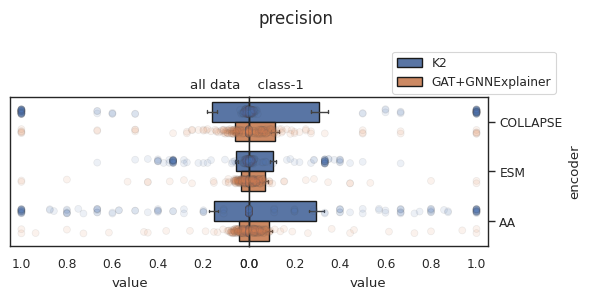

<Figure size 640x480 with 0 Axes>

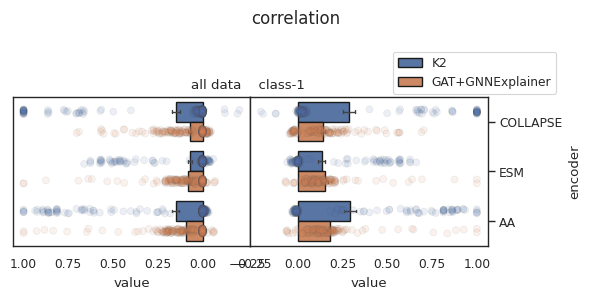

<Figure size 640x480 with 0 Axes>

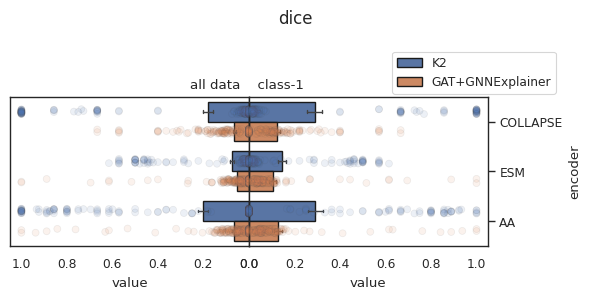

<Figure size 640x480 with 0 Axes>

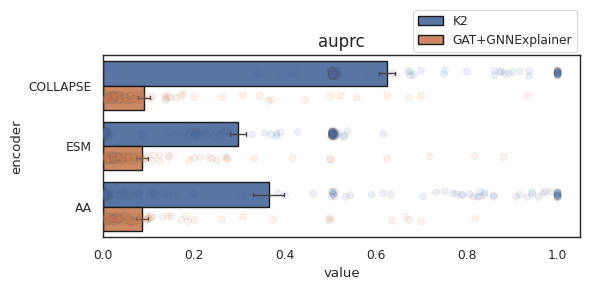

In [298]:
for met in test_metrics:
    subdf = combined_df[combined_df.metric == met].reset_index()

    plt.clf()
    if met == 'auprc':
        setup_figure(6,3)
        ax = sns.barplot(data=subdf[subdf.regime == 'all'], x='value', y='encoder', hue='method', orient='horizontal', errorbar='se', capsize=0.05, errwidth=1.0, linewidth=1, edgecolor="k")
        sns.stripplot(data=subdf[subdf.regime == 'all'], x='value', y='encoder',  hue='method', orient='horizontal', dodge=True, alpha=0.1, linewidth=0.5, ax=ax, legend=False)
        plt.title(met, fontsize=12)
        plt.legend(loc=(0.65,1.02))
    else:
        fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(6, 3), sharey=True, gridspec_kw={'wspace': 0})
        sns.barplot(data=subdf[subdf['regime'] == 'class-1'], x='value', y='encoder', hue='method', orient='horizontal', dodge=True, ax=ax2, errorbar='se', capsize=0.05, errwidth=1.0, linewidth=1, edgecolor="k")
        sns.stripplot(data=subdf[subdf['regime'] == 'class-1'], x='value', y='encoder', hue='method', orient='horizontal', dodge=True, alpha=0.1, linewidth=0.5, ax=ax2, legend=False)
        ax2.yaxis.set_label_position('right')
        ax2.tick_params(axis='y', labelright=True, right=True)
        ax2.set_title('  '+'class-1', loc='left')
        ax2.legend_.remove()
    
        sns.barplot(data=subdf[subdf['regime'] == 'all'], x='value', y='encoder', hue='method', orient='horizontal', dodge=True, ax=ax1, errorbar='se', capsize=0.05, errwidth=1.0, linewidth=1, edgecolor="k")
        sns.stripplot(data=subdf[subdf['regime'] == 'all'], x='value', y='encoder', hue='method', orient='horizontal', dodge=True, alpha=0.1, linewidth=0.5, ax=ax1, legend=False)
        ax1.legend_.remove()
    
        # optionally use the same scale left and right
        xmax = max(ax1.get_xlim()[1], ax2.get_xlim()[1])
        ax1.set_xlim(xmax=xmax)
        ax2.set_xlim(xmax=xmax)
        
        ax1.invert_xaxis()  # reverse the direction
        ax1.tick_params(labelleft=False, left=False)
        ax1.set_ylabel('')
        ax1.set_title('all data'+'  ', loc='right')

        plt.legend(loc=(0.6,1.02))

    fig.suptitle(met, fontsize=12)
    
    plt.tight_layout()
    plt.savefig(f'../data/figures/{metric}-k2-vs-baseline.png', dpi=100, format='png')
    plt.show()